<h1><center><font color=blue>Baseline for Fake Face Detection</font></center></h1>

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [2]:
%cd /gdrive/My Drive/School_UIT/Semester IV/[CS114] Machine Learning/Working/CS114.K21.KHTN/Capstone/Fake_Real_Face_Detection

/gdrive/My Drive/School_UIT/Semester IV/[CS114] Machine Learning/Working/CS114.K21.KHTN/Capstone/Fake_Real_Face_Detection


In [3]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split
import cv2 

## Dữ liệu cho bài toán
------

Dữ liệu của bài toán được lấy từ một cuộc thi trên Kaggle, xem tại [đây](https://www.kaggle.com/ciplab/real-and-fake-face-detection).

In [4]:
PATH = 'dataset/dataset_kaggle'
FAKE_DATA_PATH = os.path.join(PATH, 'fake')
REAL_DATA_PATH = os.path.join(PATH, 'real')

In [5]:
num_real_images = len(os.listdir(REAL_DATA_PATH))
num_fake_images = len(os.listdir(FAKE_DATA_PATH))

print("The number of real face images is {}".format(num_real_images))
print("The number of fake face images is {}".format(num_fake_images))

The number of real face images is 1081
The number of fake face images is 960


### Quan sát dữ liệu

In [6]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

The fake face image !


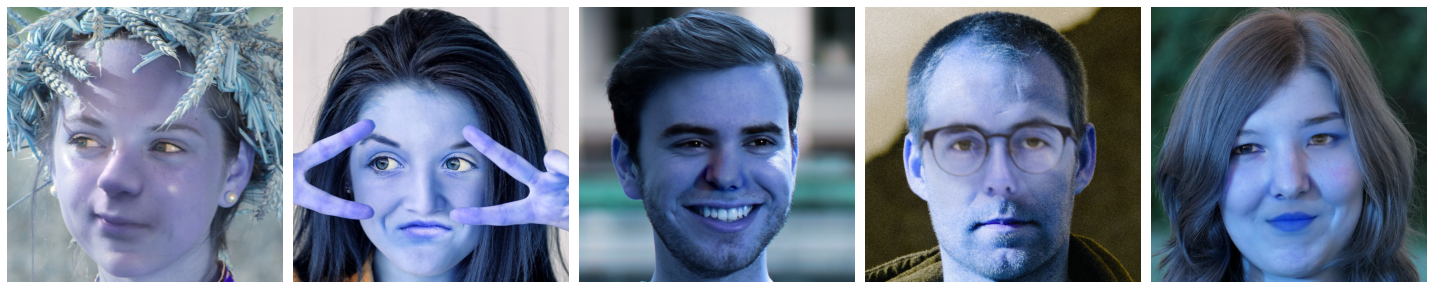

In [7]:
images = []
for file in os.listdir(FAKE_DATA_PATH)[:5]:
    image = cv2.imread(os.path.join(FAKE_DATA_PATH, file))
    images.append(image)
print("The fake face image !")
plotImages(images_arr=images)

The real face image !


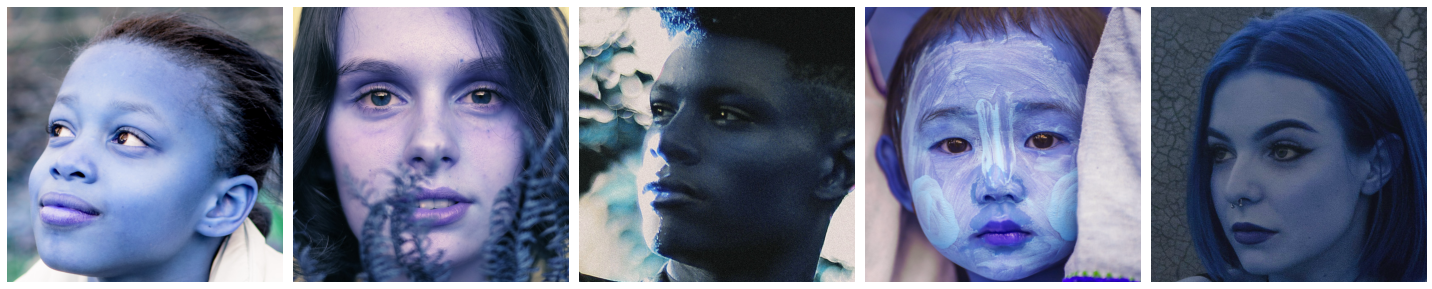

In [8]:
images = []
for file in os.listdir(REAL_DATA_PATH)[:5]:
    image = cv2.imread(os.path.join(REAL_DATA_PATH, file))
    images.append(image)
print("The real face image !")
plotImages(images_arr=images)

In [9]:
# Kích thước của mỗi ảnh
print("The size of each image is {}".format(images[0].shape))

The size of each image is (600, 600, 3)


## Độ đo cho bài toán

- Dựa theo các khảo sát, độ đo cho bài toán phát hiện khuôn mặt giả mạo dùng giá trị **Equal error rates (EER)**, Attack Presentation Classification Error Rate (APCER), Bona fide Presentation Classification Error
Rate (BPCER).

https://www.quora.com/How-can-I-understand-the-EER-Equal-Error-Rate-and-why-we-use-it


## Phương pháp dựa trên đặc trưng do chuyên gia đề xuất (hand-crafted feature)

### Hand-crafted feature là gì ?

.....

### Local Binary Pattern

Phương pháp này được công bố trong bài báo:  Multiresolution Grayscale and Rotation Invariant Texture Classification with Local Binary Pattern. 

- Local Binary Pattern là một **texture descriptor** được dùng phổ biến.
- LBPs instead compute a local representation of texture. This local representation is constructed by comparing each pixel with its surrounding neighborhood of pixels.

### Mô cả cách rút trích đặc trưng Local Binary Pattern

--- Bổ xung sau

### Tiến hành rút trích đặc trưng Local Binary Pattern từ ảnh

Định nghĩa lớp LocalBinaryPatterns

In [10]:
from skimage import feature

class LocalBinaryPatterns:
	def __init__(self, numPoints, radius):
		# store the number of points and radius
		self.numPoints = numPoints
		self.radius = radius
	def describe(self, image, eps=1e-7):
		# compute the Local Binary Pattern representation
		# of the image, and then use the LBP representation
		# to build the histogram of patterns
		lbp = feature.local_binary_pattern(image, self.numPoints,
			self.radius, method="uniform")
		(hist, _) = np.histogram(lbp.ravel(),
			bins=np.arange(0, self.numPoints + 3),
			range=(0, self.numPoints + 2))
		# normalize the histogram
		hist = hist.astype("float")
		hist /= (hist.sum() + eps)
		# return the histogram of Local Binary Patterns
		return hist

Histogram of 1st image is: 
[0.01832778 0.016225   0.01111111 0.00993333 0.00925556 0.01044444
 0.01186944 0.01478333 0.01831944 0.02626667 0.03700278 0.05659722
 0.07115278 0.058275   0.03729722 0.02525833 0.01613611 0.01267222
 0.01001111 0.00953056 0.00881389 0.01029722 0.01118889 0.01555833
 0.03059167 0.44308056]


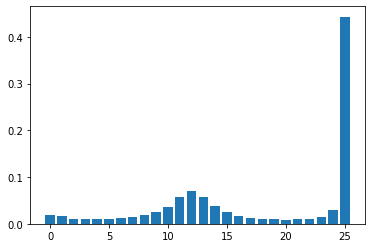

In [11]:
LBP = LocalBinaryPatterns(24, 8)
gray_image = cv2.cvtColor(images[0], cv2.COLOR_BGR2GRAY)
hist_0 = LBP.describe(gray_image)
print("Histogram of 1st image is: \n{}".format(hist_0))
plt.bar(np.arange(0, 24+2), hist_0)
plt.show()

Rút trích đặc trưng LBP cho toàn bộ dataset

In [ ]:
# dataset = []
# labelset = []

# numPoints = 24
# radius = 8
# LBP = LocalBinaryPatterns(numPoints, radius)

# for file in os.listdir(os.path.abspath(FAKE_DATA_PATH)):
#     img = cv2.imread(os.path.join(os.path.abspath(FAKE_DATA_PATH), file))
#     img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#     feature_vector = LBP.describe(img)
#     dataset.append(feature_vector)
#     labelset.append(1)

# for file in os.listdir(os.path.abspath(REAL_DATA_PATH)):
#     img = cv2.imread(os.path.join(os.path.abspath(REAL_DATA_PATH), file))
#     img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#     feature_vector = LBP.describe(img)
#     dataset.append(feature_vector)
#     labelset.append(0)

In [13]:
# with open(os.path.join(PATH, 'lbp_feature.p'), 'wb') as f:
#     pickle.dump([dataset, labelset], f)

In [14]:
with open(os.path.join(PATH, 'lbp_feature.p'), 'rb') as f:
    (dataset, labelset) = pickle.load(f)

### Phân chia dữ liệu huấn luyện và kiểm thử

In [15]:
train_X, test_X, train_y, test_y = train_test_split(dataset, labelset, shuffle=True, test_size=0.2)

In [16]:
# Thống kê một số giá trị của tập dữ liệu huấn luyện
print("The number of sample in training set is {}".format(len(train_X)))
print("The number of fake face in training set is {}".format(len([label for label in train_y if label == 1])))

The number of sample in training set is 1632
The number of fake face in training set is 770


In [17]:
# Thống kê một số giá trị của tập dữ liệu kiểm thử
print("The number of sample in training set is {}".format(len(test_X)))
print("The number of fake face in training set is {}".format(len([label for label in test_y if label == 1])))

The number of sample in training set is 409
The number of fake face in training set is 190


### Chọn thuật toán và huấn luyện mô hình

Thử nghiệm bài toán với các mô hình sau:


*   Logistic Regression
*   k-Nestest Neighbord (kNN)
*   Random Forest
*   Naive Bayes
*   Support Vector Machine (SVM)



In [18]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.neural_network import MLPClassifier

#### Thử nghiệm với các mô hình khác nhau

In [19]:
logistic_model = LogisticRegression(random_state=0)
knn_model = KNeighborsClassifier(n_neighbors=2, weights='uniform')
randomForest_model = RandomForestClassifier(max_depth=2, random_state=0)
naiveBayes_model = GaussianNB()
svm_model = svm.SVC()
neuronNetwork_model = MLPClassifier(solver='adam', activation='relu', 
                                    alpha=1e-6, hidden_layer_sizes=(5, 2), 
                                    batch_size='auto', max_iter=100000,
                                    verbose=False, 
                                    random_state=1)

Mô hình Logistic regression

In [20]:
logistic_model.fit(train_X, train_y)
print("- Độ chính xác của mô hình logistic regression trên tập dữ liệu huấn luyện: {}".format(logistic_model.score(train_X, train_y)))
test_pred = logistic_model.predict(test_X)
print("- Độ chính xác của mô hình logistic regression trên tập dữ liệu kiểm thử: {}".format(accuracy_score(y_true=test_y, y_pred=test_pred)))
print("- Confusion matrix: \n{}".format(classification_report(y_true=test_y, y_pred=test_pred)))

- Độ chính xác của mô hình logistic regression trên tập dữ liệu huấn luyện: 0.5263480392156863
- Độ chính xác của mô hình logistic regression trên tập dữ liệu kiểm thử: 0.5403422982885085
- Confusion matrix: 
              precision    recall  f1-score   support

           0       0.54      0.98      0.70       219
           1       0.60      0.03      0.06       190

    accuracy                           0.54       409
   macro avg       0.57      0.51      0.38       409
weighted avg       0.57      0.54      0.40       409



Mô hình kNN

In [21]:
knn_model.fit(train_X, train_y)
print("- Độ chính xác của mô hình kNN trên tập dữ liệu huấn luyện: {}".format(knn_model.score(train_X, train_y)))
test_pred = knn_model.predict(test_X)
print("- Độ chính xác của mô hình kNN trên tập dữ liệu kiểm thử: {}".format(accuracy_score(y_true=test_y, y_pred=test_pred)))
print("- Confusion matrix: \n{}".format(classification_report(y_true=test_y, y_pred=test_pred)))

- Độ chính xác của mô hình kNN trên tập dữ liệu huấn luyện: 0.7389705882352942
- Độ chính xác của mô hình kNN trên tập dữ liệu kiểm thử: 0.4938875305623472
- Confusion matrix: 
              precision    recall  f1-score   support

           0       0.52      0.69      0.59       219
           1       0.43      0.26      0.33       190

    accuracy                           0.49       409
   macro avg       0.47      0.48      0.46       409
weighted avg       0.48      0.49      0.47       409



Random forest

In [22]:
randomForest_model.fit(train_X, train_y)
print("- Độ chính xác của mô hình random forest trên tập dữ liệu huấn luyện: {}".format(randomForest_model.score(train_X, train_y)))
test_pred = randomForest_model.predict(test_X)
print("- Độ chính xác của mô hình random forest trên tập dữ liệu kiểm thử: {}".format(accuracy_score(y_true=test_y, y_pred=test_pred)))
print("- Confusion matrix: \n{}".format(classification_report(y_true=test_y, y_pred=test_pred)))

- Độ chính xác của mô hình random forest trên tập dữ liệu huấn luyện: 0.585171568627451
- Độ chính xác của mô hình random forest trên tập dữ liệu kiểm thử: 0.5281173594132029
- Confusion matrix: 
              precision    recall  f1-score   support

           0       0.54      0.80      0.64       219
           1       0.48      0.22      0.30       190

    accuracy                           0.53       409
   macro avg       0.51      0.51      0.47       409
weighted avg       0.51      0.53      0.48       409



Mô hình Naive Bayes

In [23]:
naiveBayes_model.fit(train_X, train_y)
print("- Độ chính xác của mô hình Naive Bayes trên tập dữ liệu huấn luyện: {}".format(naiveBayes_model.score(train_X, train_y)))
test_pred = naiveBayes_model.predict(test_X)
print("- Độ chính xác của mô hình Naive Bayes trên tập dữ liệu kiểm thử: {}".format(accuracy_score(y_true=test_y, y_pred=test_pred)))
print("- Confusion matrix: \n{}".format(classification_report(y_true=test_y, y_pred=test_pred)))

- Độ chính xác của mô hình Naive Bayes trên tập dữ liệu huấn luyện: 0.5238970588235294
- Độ chính xác của mô hình Naive Bayes trên tập dữ liệu kiểm thử: 0.5134474327628362
- Confusion matrix: 
              precision    recall  f1-score   support

           0       0.56      0.41      0.47       219
           1       0.48      0.64      0.55       190

    accuracy                           0.51       409
   macro avg       0.52      0.52      0.51       409
weighted avg       0.53      0.51      0.51       409



Mô hình SVM

In [24]:
svm_model.fit(train_X, train_y)
print("- Độ chính xác của mô hình SVM trên tập dữ liệu huấn luyện: {}".format(svm_model.score(train_X, train_y)))
test_pred = svm_model.predict(test_X)
print("- Độ chính xác của mô hình SVM trên tập dữ liệu kiểm thử: {}".format(accuracy_score(y_true=test_y, y_pred=test_pred)))
print("- Confusion matrix: \n{}".format(classification_report(y_true=test_y, y_pred=test_pred)))

- Độ chính xác của mô hình SVM trên tập dữ liệu huấn luyện: 0.5281862745098039
- Độ chính xác của mô hình SVM trên tập dữ liệu kiểm thử: 0.5354523227383863
- Confusion matrix: 
              precision    recall  f1-score   support

           0       0.54      1.00      0.70       219
           1       0.00      0.00      0.00       190

    accuracy                           0.54       409
   macro avg       0.27      0.50      0.35       409
weighted avg       0.29      0.54      0.37       409



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Mô hình mạng neuron

In [25]:
neuronNetwork_model.fit(train_X, train_y)
print("- Độ chính xác của mô hình mạng neuron trên tập dữ liệu huấn luyện: {}".format(neuronNetwork_model.score(train_X, train_y)))
test_pred = neuronNetwork_model.predict(test_X)
print("- Độ chính xác của mô hình mạng neuron trên tập dữ liệu kiểm thử: {}".format(accuracy_score(y_true=test_y, y_pred=test_pred)))
print("- Confusion matrix: \n{}".format(classification_report(y_true=test_y, y_pred=test_pred)))

- Độ chính xác của mô hình mạng neuron trên tập dữ liệu huấn luyện: 0.5281862745098039
- Độ chính xác của mô hình mạng neuron trên tập dữ liệu kiểm thử: 0.5354523227383863
- Confusion matrix: 
              precision    recall  f1-score   support

           0       0.54      1.00      0.70       219
           1       0.00      0.00      0.00       190

    accuracy                           0.54       409
   macro avg       0.27      0.50      0.35       409
weighted avg       0.29      0.54      0.37       409



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Nhận xét về các thuật toán được dùng dựa trên hand-crafted feature

- ...

## Phương pháp dựa trên đặc trưng học sâu

Trong phần này, em thử nghiệm các kiến trúc mạng neuron để rút trích đặc trưng từ ảnh đầu vào sau đó cho qua bộ phân lớp SVM.

Các kiến trúc mạng dựa trên Convolutional Neural Network (CNN) được thử nghiệm gồm có:

1. AlexNet
2. VGG16
3. VGG19.
4. ResNet.
5. Xception.
6. Inception.

In [26]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
import numpy as np
np.random.seed(1000)

Using TensorFlow backend.


### AlexNet

In [ ]:
#Instantiate an empty model
alexnet_model = Sequential(name='Alex Net')

# 1st Convolutional Layer
alexnet_model.add(Conv2D(filters=96, input_shape=(224,224,3), kernel_size=(11,11), strides=(4,4), padding='valid'))
alexnet_model.add(Activation('relu'))
# Max Pooling
alexnet_model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

# 2nd Convolutional Layer
alexnet_model.add(Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='valid'))
alexnet_model.add(Activation('relu'))
# Max Pooling
alexnet_model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

# 3rd Convolutional Layer
alexnet_model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
alexnet_model.add(Activation('relu'))

# 4th Convolutional Layer
alexnet_model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
alexnet_model.add(Activation('relu'))

# 5th Convolutional Layer
alexnet_model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'))
alexnet_model.add(Activation('relu'))
# Max Pooling
alexnet_model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

# Passing it to a Fully Connected layer
alexnet_model.add(Flatten())
# 1st Fully Connected Layer
alexnet_model.add(Dense(4096, input_shape=(224*224*3,)))
alexnet_model.add(Activation('relu'))
# Add Dropout to prevent overfitting
alexnet_model.add(Dropout(0.4))

# 2nd Fully Connected Layer
alexnet_model.add(Dense(4096))
alexnet_model.add(Activation('relu'))
# Add Dropout
alexnet_model.add(Dropout(0.4))

# 3rd Fully Connected Layer
alexnet_model.add(Dense(1000))
alexnet_model.add(Activation('relu'))
# Add Dropout
alexnet_model.add(Dropout(0.4))

# Output Layer
alexnet_model.add(Dense(17))
alexnet_model.add(Activation('softmax'))

alexnet_model.summary()

# Compile the model
alexnet_model.compile(loss='hinge',
                      optimizer='adam', 
                      metrics=['accuracy'])

In [ ]:
alexnet_model.fit(X)